# Graphs and maps (Matplotlib and Basemap)

Nikolay Koldunov

koldunovn@gmail.com

This is part of [**Python for Geosciences**](https://github.com/koldunovn/python_for_geosciences) notes.

=============

[Matplotlib](http://matplotlib.org/) is a python 2D plotting library which produces publication quality figures in a variety of hardcopy formats and interactive environments across platforms.

Usually we import `matplotlib` as follows:

In [2]:
%matplotlib inline
import matplotlib.pylab as plt
import numpy as np

This allows inline graphics in IPython (Jupyter) notebooks and imports functions nessesary for ploting as `plt`. In addition we import `numpy` as `np`.

Let's prepare some data:

In [3]:
x = np.linspace(0,10,20)
y = x ** 2

Plot is as easy as this:

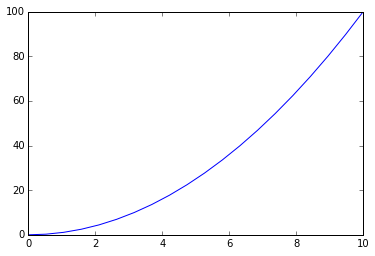

In [5]:
plt.plot(x,y);

Line style and labels are controlled in a way similar to Matlab:

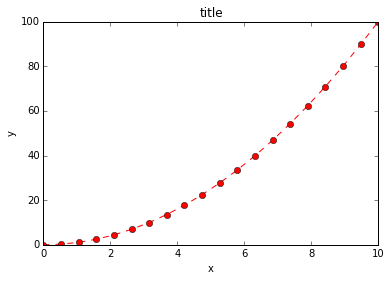

In [8]:
plt.plot(x, y, 'r--o')
plt.xlabel('x')
plt.ylabel('y')
plt.title('title');

You can plot several individual lines at once:

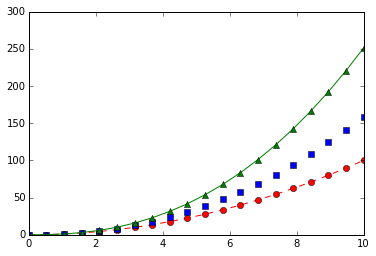

In [10]:
plt.plot(x, y, 'r--o', x, y ** 1.1, 'bs', x, y ** 1.2, 'g^-' );

One more example:

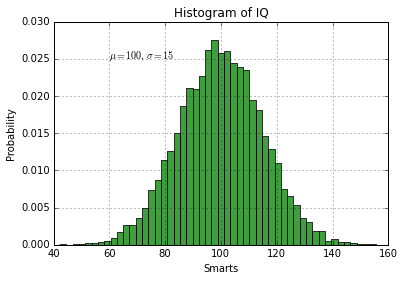

In [11]:
mu, sigma = 100, 15
x = mu + sigma * np.random.randn(10000)

# the histogram of the data
n, bins, patches = plt.hist(x, 50, normed=1, facecolor='g', alpha=0.75)

plt.xlabel('Smarts')
plt.ylabel('Probability')
plt.title('Histogram of IQ')
plt.text(60, .025, r'$\mu=100,\ \sigma=15$')
plt.axis([40, 160, 0, 0.03])
plt.grid(True)

If you feel a bit playful (only in matplotlib > 1.3):

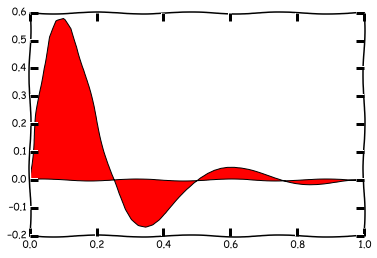

In [19]:
with plt.xkcd():
    x = np.linspace(0, 1)
    y = np.sin(4 * np.pi * x) * np.exp(-5 * x)

    plt.fill(x, y, 'r')
    plt.grid(False)

Following example is from [matplotlib - 2D and 3D plotting in Python](http://nbviewer.ipython.org/urls/raw.github.com/jrjohansson/scientific-python-lectures/master/Lecture-4-Matplotlib.ipynb) - great place to start for people interested in matplotlib.


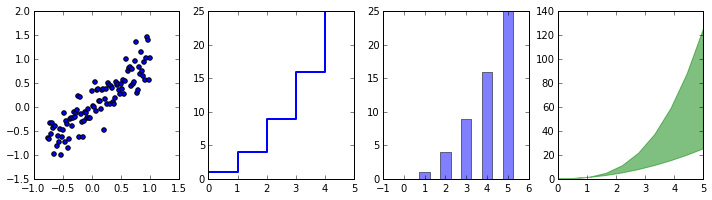

In [27]:
n = np.array([0,1,2,3,4,5])
xx = np.linspace(-0.75, 1., 100)
x = np.linspace(0, 5, 10)

fig, axes = plt.subplots(1, 4, figsize=(12,3))

axes[0].scatter(xx, xx + 0.25*np.random.randn(len(xx)))

axes[1].step(n, n**2, lw=2)

axes[2].bar(n, n**2, align="center", width=0.5, alpha=0.5)

axes[3].fill_between(x, x**2, x**3, color="green", alpha=0.5);

When you going to plot something more or less complicated in Matplotlib, the first thing you do is open the [Matplotlib example gallery](http://matplotlib.org/gallery.html) and choose example closest to your case.

You can directly load python code (or basically any text file) to the notebook. This time we download code from the Matplotlib example gallery:

/Users/koldunov/miniconda/lib/python2.7/site-packages/matplotlib/tri/triangulation.py:110: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  self._neighbors)


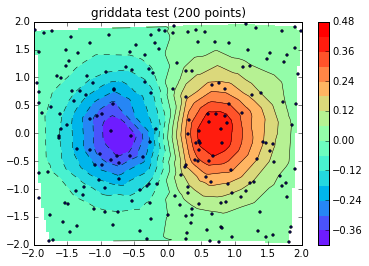

In [29]:
# %load http://matplotlib.org/mpl_examples/pylab_examples/griddata_demo.py
from numpy.random import uniform, seed
from matplotlib.mlab import griddata
import matplotlib.pyplot as plt
import numpy as np
# make up data.
#npts = int(raw_input('enter # of random points to plot:'))
seed(0)
npts = 200
x = uniform(-2, 2, npts)
y = uniform(-2, 2, npts)
z = x*np.exp(-x**2 - y**2)
# define grid.
xi = np.linspace(-2.1, 2.1, 100)
yi = np.linspace(-2.1, 2.1, 200)
# grid the data.
zi = griddata(x, y, z, xi, yi, interp='linear')
# contour the gridded data, plotting dots at the nonuniform data points.
CS = plt.contour(xi, yi, zi, 15, linewidths=0.5, colors='k')
CS = plt.contourf(xi, yi, zi, 15, cmap=plt.cm.rainbow,
                  vmax=abs(zi).max(), vmin=-abs(zi).max())
plt.colorbar()  # draw colorbar
# plot data points.
plt.scatter(x, y, marker='o', c='b', s=5, zorder=10)
plt.xlim(-2, 2)
plt.ylim(-2, 2)
plt.title('griddata test (%d points)' % npts)
plt.show()


## Maps

In order to create a map we have to first import some data. We are going to use NCEP reanalysis file from previous section:

In [31]:
from netCDF4 import Dataset

In [32]:
f =Dataset('air.sig995.2012.nc')

Here we create netCDF variable objec for *air* (we would like to have acces to some of the attributes), but from *lat* and *lon* we import only data valies:

In [33]:
air = f.variables['air']
lat = f.variables['lat'][:]
lon = f.variables['lon'][:]

Easiest way to look at the array is imshow:

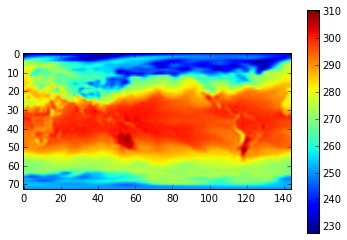

In [36]:
plt.imshow(air[0,:,:])
plt.colorbar();

But we want some real map :) First convert data from *air*:

In [37]:
air_c = air[:]  - 273.15

Our coordinate variables are vectors:

In [38]:
lat.shape

(73,)

For the map we need 2d coordinate arrays. Convert lot lan to 2d:

In [39]:
lon2, lat2 = np.meshgrid(lon,lat)

Import Basemap - library for plotting 2D data on maps:

In [40]:
from mpl_toolkits.basemap import Basemap

Create Basemap instance (with certain characteristics) and convert lon lat to map coordinates

In [41]:
m = Basemap(projection='npstere',boundinglat=60,lon_0=0,resolution='l')
x, y = m(lon2, lat2)

Creating the map now is only two lines:

<matplotlib.contour.QuadContourSet instance at 0x1073367e8>

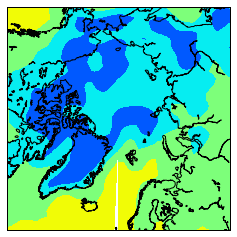

In [45]:
m.drawcoastlines()
m.contourf(x,y,air_c[0,:,:])

We can make the map look prettier by adding couple of lines:

<matplotlib.colorbar.Colorbar instance at 0x1120c24d0>

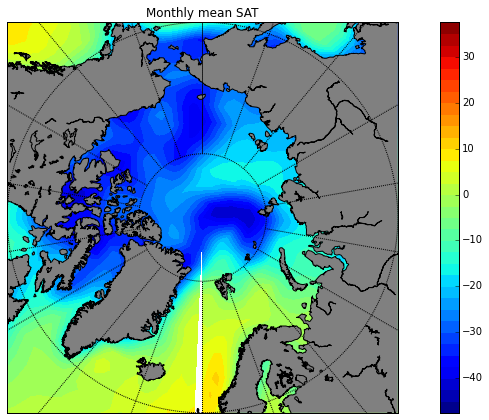

In [47]:
fig = plt.figure(figsize=(15,7))
m.fillcontinents(color='gray',lake_color='gray')
m.drawcoastlines()
m.drawparallels(np.arange(-80.,81.,20.))
m.drawmeridians(np.arange(-180.,181.,20.))
m.drawmapboundary(fill_color='white')
m.contourf(x,y,air_c[0,:,:],40)
plt.title('Monthly mean SAT')
plt.colorbar()

You can change map characteristics by changin the Basemap instance:

In [48]:
m = Basemap(projection='ortho',lat_0=45,lon_0=-100,resolution='l')
x, y = m(lon2, lat2)

While the rest of the code might be the same:

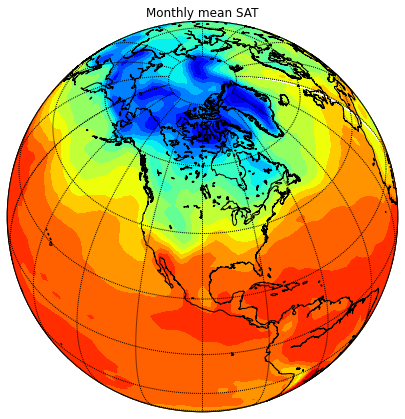

In [49]:
fig = plt.figure(figsize=(15,7))
#m.fillcontinents(color='gray',lake_color='gray')
m.drawcoastlines()
m.drawparallels(np.arange(-80.,81.,20.))
m.drawmeridians(np.arange(-180.,181.,20.))
m.drawmapboundary(fill_color='white')
cs = m.contourf(x,y,air_c[0,:,:],20)
plt.title('Monthly mean SAT')

One more map exampe:

In [50]:
m = Basemap(projection='cyl',llcrnrlat=-90,urcrnrlat=90,\
            llcrnrlon=0,urcrnrlon=360,resolution='c')
x, y = m(lon2, lat2)

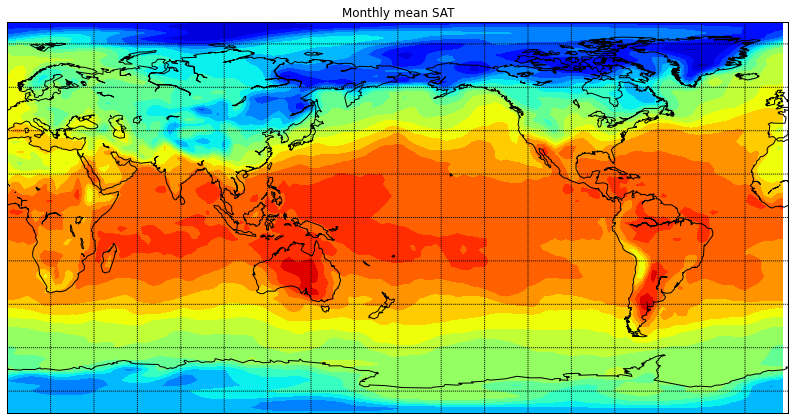

In [51]:
fig = plt.figure(figsize=(15,7))
#m.fillcontinents(color='gray',lake_color='gray')
m.drawcoastlines()
m.drawparallels(np.arange(-80.,81.,20.))
m.drawmeridians(np.arange(0.,360.,20.))
m.drawmapboundary(fill_color='white')
cs = m.contourf(x,y,air[0,:,:],20)
plt.title('Monthly mean SAT')

## Links:

* [Basemap Example Gallery](http://matplotlib.org/basemap/users/examples.html)
* [PyNGL Gallery](http://www.pyngl.ucar.edu/Examples/gallery.shtml)
* [ggplot for python](http://blog.yhathq.com/posts/ggplot-for-python.html)
* [Bokeh](https://github.com/ContinuumIO/Bokeh)
* [d3py](https://github.com/mikedewar/d3py)